In [77]:
import pygal
from IPython.display import SVG, display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium

In [78]:
df = pd.read_csv("data/events_prepared.csv")
df.head()

,Unnamed: 0,web-scraper-order,name,description,price,address,category,date_formatted,time_from,time_until,duration_seconds,is_concert,description_len,lat,lon,bfs_nummer,gemeinde,distance_bahnhof,kanton
0,0,1701178304-1235,Live-Musik mit Sina Anastasia,ihr name *ein hauch von melodie* ihre ausstra...,NaN,"Baselstrasse 43, Riehen",Konzert / Singer & Songwriter,2023/12/01,19:00:00,22:00:00,10800.0,True,2860.0,47.584694,7.649675,2703,Riehen,231.871315,BS
1,1,1701178306-1236,"Metal Marmot, 1. - 2. Dezember 2023",metal marmot im dezember 2023: freitag 1. deze...,40.0,"Kanderstegstrasse 25, Frutigen",Konzert / Hard Rock & Heavy Metal,2023/12/01,19:00:00,NaN,NaN,True,245.0,46.586052,7.647597,563,Frutigen,431.905393,BE
2,2,1701178308-1237,JAMfreeday,alle sind herzlich eingeladen um zu musizieren...,NaN,"28, Herisau",Konzert,2023/12/01,19:00:00,NaN,NaN,True,188.0,47.387520,9.309265,3001,Herisau,1931.580777,AR
3,3,1701178310-1238,Am Hummelwald,"der kurzprosaband ""am hummelwald - miniaturen ...",NaN,"St.Leonhard-Strasse 40, St.Gallen",Konzert,2023/12/01,19:00:00,NaN,NaN,True,1060.0,47.422333,9.370071,3203,St. Gallen,94.997717,SG
4,4,1701178312-1239,BELPHEGOR 30 Year Tour Special Guest: Arkona &...,belphegor marschiert durch europa winter mmxxi...,38.0,"Aarburg, CH",Konzert / Hard Rock & Heavy Metal,2023/12/01,19:00:00,23:50:00,17400.0,True,734.0,47.324833,7.905110,4271,Aarburg,559.350472,AG


# Non-graphical EDA

## Shape all events (number of rows and columns)

In [79]:
df.shape

(1543, 19)

## Shape of data that has no missing value (so it has a price and duration)

In [80]:
df_price = df.dropna()
df_price = df_price.dropna()
df_price.shape

(382, 19)

## Summary statistics of numeric variables

In [81]:
df_price.describe()

,Unnamed: 0,price,duration_seconds,description_len,lat,lon,bfs_nummer,distance_bahnhof
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,788.431937,24.642670,17755.916230,1433.680628,47.284469,8.311583,1973.405759,736.212599
std,470.159083,14.878263,8182.263647,1581.915440,0.247990,0.640313,1580.789646,781.223553
min,4.000000,0.000000,3600.000000,18.000000,46.295605,6.647134,2.000000,25.709271
25%,411.500000,15.000000,10800.000000,513.750000,47.116894,7.631430,261.000000,340.141778
50%,763.000000,25.000000,18000.000000,836.000000,47.372025,8.439081,1711.000000,531.288302
75%,1200.500000,30.000000,23400.000000,1374.000000,47.443899,8.554320,3276.000000,862.605955
max,1533.000000,130.000000,43200.000000,13991.000000,47.697395,10.275710,6297.000000,6023.316921


## Skewness

In [82]:
df_price[['price', 'duration_seconds', 'description_len', 'distance_bahnhof']].skew()

price               2.158674
duration_seconds    0.190120
description_len     2.674485
distance_bahnhof    3.733133
dtype: float64

## Kurtosis

In [83]:
df_price[['price', 'duration_seconds', 'description_len', 'distance_bahnhof']].kurtosis()

price               10.525592
duration_seconds    -0.527486
description_len     12.462694
distance_bahnhof    18.959686
dtype: float64

## Cross-tabulation
Shows the relation between if an event is a concert or party and it's price

In [84]:
pd.crosstab(df_price['is_concert'], df['price'])

price,0.0,0.8,5.0,8.0,9.0,10.0,12.0,12.9,13.0,15.0,...,50.0,53.0,58.0,59.0,60.0,68.0,85.0,99.0,110.0,130.0
is_concert,,,,,,,,,,,,,,,,,,,,,
False,0,1,7,7,1,31,4,2,1,26,...,0,0,0,4,0,1,0,1,0,1
True,11,0,0,1,0,4,0,0,4,14,...,6,1,1,1,1,0,1,0,1,0


## Correlation matrix

In [85]:
corr = df_price[['price', 
          'duration_seconds', 
          'description_len', 
          'distance_bahnhof']].cov().corr()
corr

,price,duration_seconds,description_len,distance_bahnhof
price,1.000000,-0.975361,0.432288,-0.414576
duration_seconds,-0.975361,1.000000,-0.225678,0.268286
description_len,0.432288,-0.225678,1.000000,-0.623078
distance_bahnhof,-0.414576,0.268286,-0.623078,1.000000


# Graphical EDA

## Boxplot for the price

<AxesSubplot:xlabel='price'>

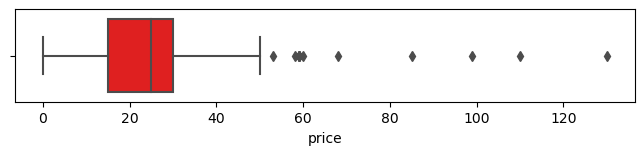

In [86]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_price['price'], color="red")

## Scatterplot

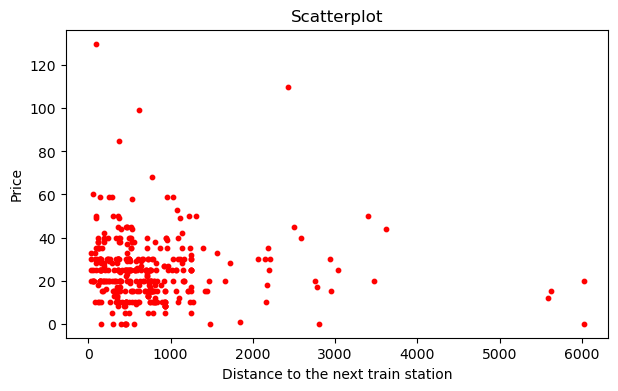

In [87]:
plt.figure(figsize=(7,4))
plt.scatter(df_price['distance_bahnhof'], 
           df_price['price'], 
           color="red", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('Distance to the next train station')
plt.ylabel('Price')
plt.show()

# Visualization of geographical data

## Map of all events

In [88]:
# Initialisierung der Map
m = folium.Map(location=[46.8, 8.1], zoom_start=8)

for i in range(0, len(df_price)):
    folium.Marker(location=(df.iloc[i]['lat'], 
                            df.iloc[i]['lon']), 
                  popup=df.iloc[i]['address']).add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# Plot map
m

## Distribution of events by cantons

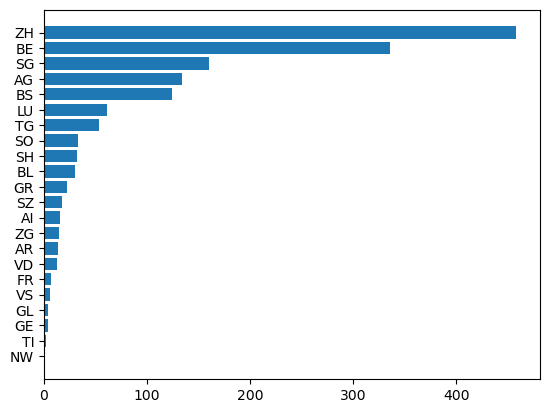

In [89]:
df_count = pd.DataFrame.from_dict(kanton_count, orient="index")
df_count.reset_index(inplace=True)
df_count = df_count.rename(columns = {'index':'kanton', 0: 'count'})
df_count = df_count.sort_values('count', ascending=True)

plt.barh(df_count['kanton'], df_count['count'])
plt.show()

In [90]:
kanton_count = df["kanton"].value_counts().to_dict()
kanton_count_map = {}
for k, v in kanton_count.items():
    kanton_count_map["kt-" + k.lower()] = v # The switzerland map needs the cantons in the format 'kt-..' for example 'kt-zh'

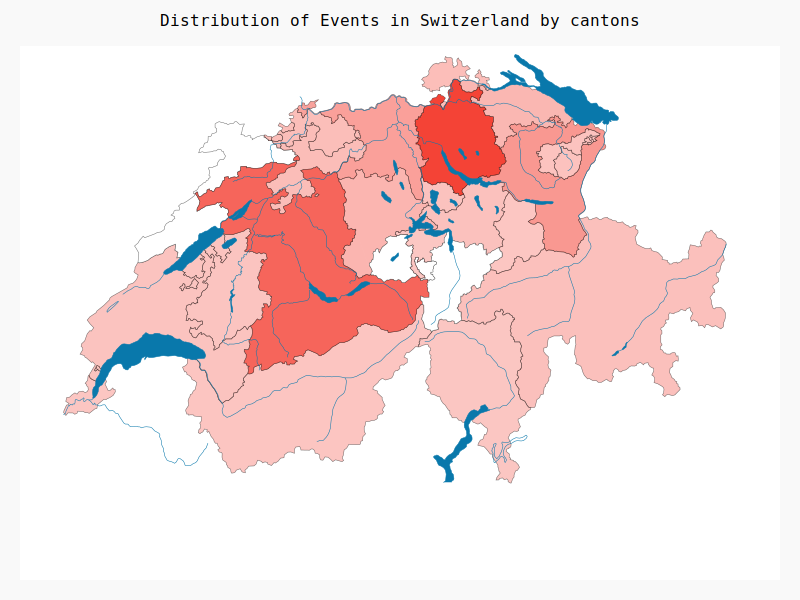

In [91]:
ch_chart = pygal.maps.ch.Cantons(show_legend=False)
ch_chart.title = 'Distribution of Events in Switzerland by cantons'

ch_chart.add('Random Data', kanton_count_map) 


display(SVG(ch_chart.render(disable_xml_declaration=True)))

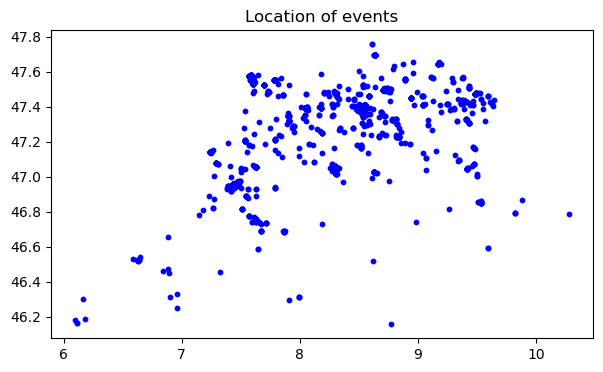

In [92]:
plt.figure(figsize=(7,4))
plt.scatter(df['lon'], 
           df['lat'], 
           color="Blue", 
           alpha=1.0,
           s=10)
plt.title('Location of events', fontsize=12)
plt.show()

### Jupyter notebook --footer info--

In [94]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.1.0
Datetime: 2023-12-02 23:28:40
Python Version: 3.9.13
-----------------------------------
